In [55]:
import pandas as pd

In [56]:
df = pd.read_csv('/content/SMSSpamCollection', sep='\t',
                 names=['label','text'])

In [57]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df.shape

(5572, 2)

In [59]:
!pip install nltk

In [60]:
import nltk

In [61]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
sentence = "Hello frineds!, how are you."

In [63]:
# tokenize the content
# it is nothing but seperating the whole line into parts
from nltk.tokenize import word_tokenize
word_tokenize(sentence)

['Hello', 'frineds', '!', ',', 'how', 'are', 'you', '.']

In [64]:
# Now,
# Removing all the stopwords
from nltk.corpus import stopwords

In [65]:
swords = stopwords.words('english')

In [66]:
clean = [word for word in word_tokenize(sentence) if word not  in swords ]

In [67]:
print(clean)

['Hello', 'frineds', '!', ',', '.']


In [68]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sentence)
            if word not in swords]

In [69]:
print(clean)

['hello', 'frine', '!', ',', '.']


In [70]:
sent = "Hello friends! How are you? We will be learning Python today"

# We can also make a function to clean the data

In [71]:
# here we can also make a function to clean the data
def clean_text(sentence):
  # This will tokenize the sentence
  token = word_tokenize(sentence)
  # This will remove stopwords from the sentence
  clean = [word for word in token
           if word.isdigit or word.isalpha]
  # This will remove the stem words(postfix from the word)
  clean = [ps.stem(word) for word in token
           if word not in swords]
  return clean

In [72]:
clean_text(sent)

['hello', 'friend', '!', 'how', '?', 'we', 'learn', 'python', 'today']

# Preprocessing
# Coverting Charecter to Numeric value using TF-IDF Vectorize

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [75]:
x = df['text']
y = df['label']

In [76]:
x_new = tfidf.fit_transform(x)

In [77]:
x.shape

(5572,)

In [78]:
x_new.shape

(5572, 8055)

In [79]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y, random_state = 0, test_size = 0.25)

In [82]:
x_train.shape

(4179, 8055)

In [83]:
x_test.shape

(1393, 8055)

# Naive_Bayes Classifier


In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb = GaussianNB()

In [86]:
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [87]:
y_pred = nb.predict(x_test.toarray())

In [88]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

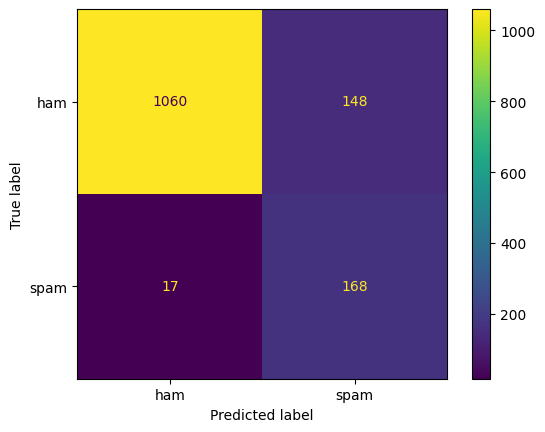

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.88      0.93      1208
        spam       0.53      0.91      0.67       185

    accuracy                           0.88      1393
   macro avg       0.76      0.89      0.80      1393
weighted avg       0.92      0.88      0.89      1393



In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8815506101938263

#         RandomForest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [94]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [95]:
y_pred = rf.predict(x_test)

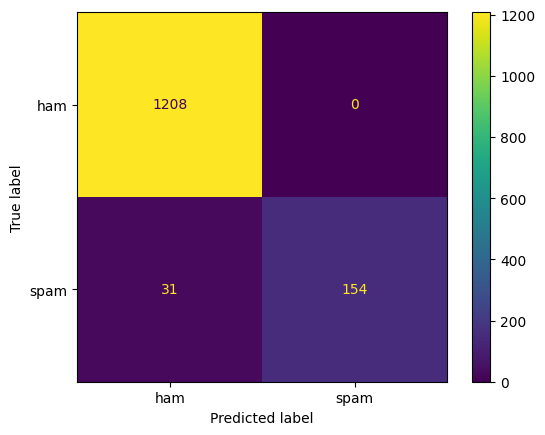

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [98]:
accuracy_score(y_test,y_pred)

0.9777458722182341

# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [105]:
log.fit(x_train, y_train)

LogisticRegression()

In [106]:
y_pred = log.predict(x_test)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.71      0.83       185

    accuracy                           0.96      1393
   macro avg       0.97      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



In [108]:
accuracy_score(y_test, y_pred)

0.9605168700646087

# Hyper Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = {
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'random_state':[0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}

In [114]:
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')

In [120]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [ ]:
rf = grid.best_estimator_

In [122]:
y_pred = rf.predict = (x_test)

In [124]:
accuracy_score(y_test,y_pred)

ValueError: ignored